In [141]:
! pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [142]:
import matplotlib.pyplot as plt
import numpy as np
# Import libraries
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [143]:
# Load the data
df = pd.read_csv('stroke_data.csv', sep=',', index_col="id")

In [144]:
print(df.head())

       gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
9046     Male  67.0             0              1          Yes        Private   
51676  Female  61.0             0              0          Yes  Self-employed   
31112    Male  80.0             0              1          Yes        Private   
60182  Female  49.0             0              0          Yes        Private   
1665   Female  79.0             1              0          Yes  Self-employed   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
id                                                                      
9046           Urban             228.69  36.6  formerly smoked       1  
51676          Rural             202.21   NaN     never smoked       1  
31112          Rural             105.92  32.5     never smoked       1  
60182          Urban             171.23  34.4           smokes       1  
1

In [145]:
# check the coulumn name
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [146]:
# describe the dataframe
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [147]:
# describe the dataframe T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [148]:
# describe the categorical data
df[["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]].describe(exclude=float)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [149]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [150]:
# Check missing values
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


bmi have 201 null values

In [151]:
# Handle missing bmi by replacing with median
df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [152]:
# show possible values in gender
df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [153]:
# show possible values in ever_married
df["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [154]:
# show possible values in work_type
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [155]:
# show possible values in Residence_type
df["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [156]:
# show possible values in  smoking_status
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [157]:
# show possible values in  heart_disease
df["heart_disease"].unique()

array([1, 0], dtype=int64)

In [158]:
# show possible values in  hypertension
df["hypertension"].unique()

array([0, 1], dtype=int64)

Noticed that 'smoking_status' has 'Unknown' values.

In [159]:
# we can replace 'Unknown' by the mode (most common value)
df['smoking_status'].replace('Unknown', np.nan, inplace=True)
df['smoking_status'].fillna(df['smoking_status'].mode()[0], inplace=True)

In [160]:
# Check after cleaning
print(df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [161]:
# Exploratory Data Analysis (EDA)

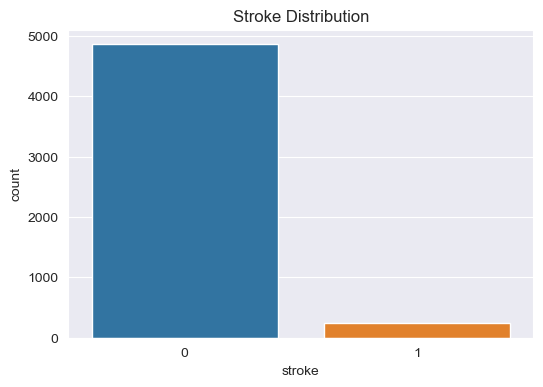

In [162]:
# Stroke distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=df)
plt.title('Stroke Distribution')
plt.show()

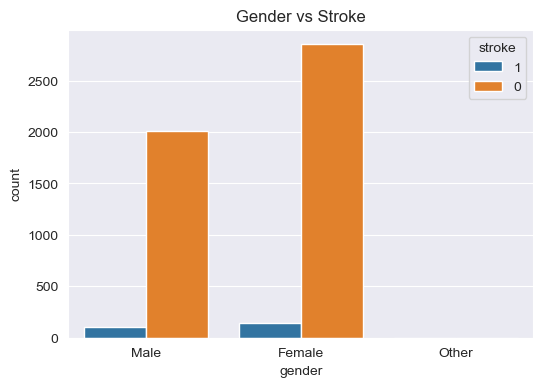

In [163]:
# Gender vs Stroke
df['stroke'] = df['stroke'].astype(str)
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='stroke', data=df)
plt.title('Gender vs Stroke')
plt.show()


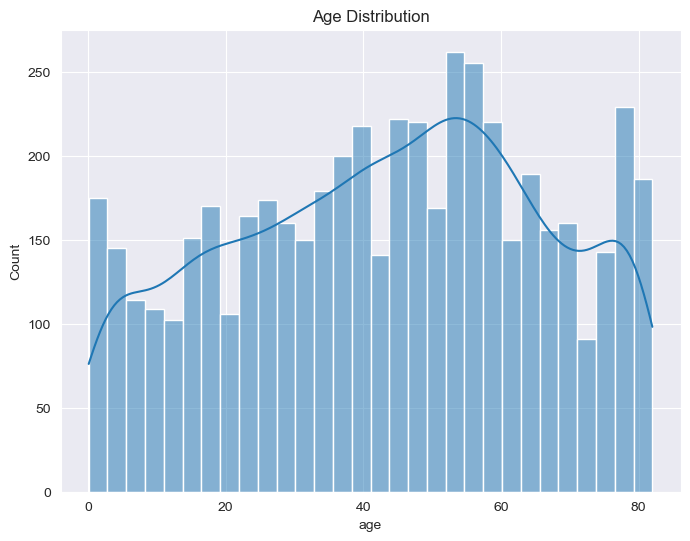

In [164]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()


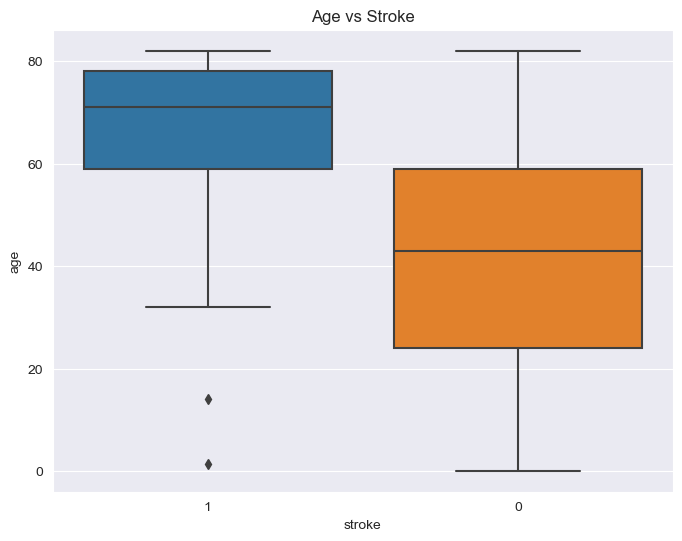

In [165]:
# Age vs Stroke
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Age vs Stroke')
plt.show()


Stroke risk increases with age.

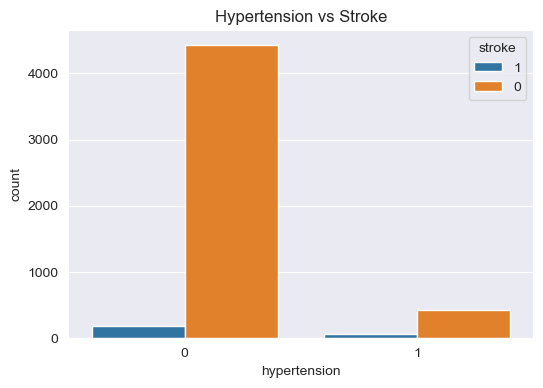

In [166]:
# Hypertension vs Stroke
df['stroke'] = df['stroke'].astype(str)
plt.figure(figsize=(6, 4))
sns.countplot(x='hypertension', hue='stroke', data=df)
plt.title('Hypertension vs Stroke')
plt.show()

Stroke risk is higher among patients with hypertension

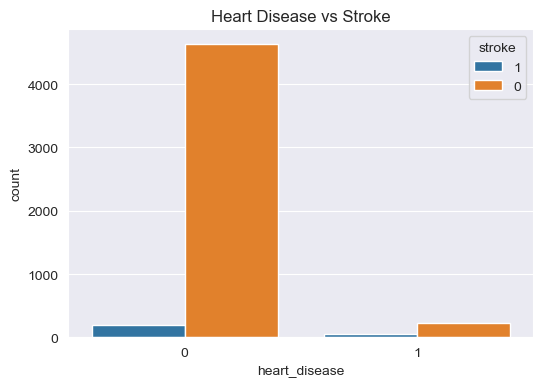

In [167]:
# Heart Disease vs Stroke
df['stroke'] = df['stroke'].astype(str)
plt.figure(figsize=(6, 4))
sns.countplot(x='heart_disease', hue='stroke', data=df)
plt.title('Heart Disease vs Stroke')
plt.show()

Stroke risk is higher among patients with heart disease

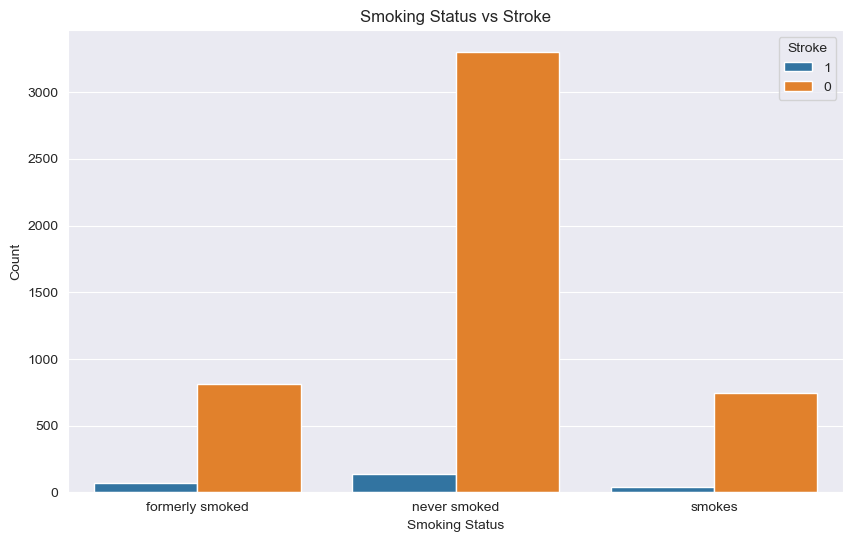

In [168]:
# Smoking Status Vs Stroke
df['stroke'] = df['stroke'].astype(str)

plt.figure(figsize=(10, 6))  # Define figure size
sns.countplot(x='smoking_status', hue='stroke', data=df)  # Create the countplot

plt.title('Smoking Status vs Stroke')  # Add title
plt.xlabel('Smoking Status')  # Add label to x-axis
plt.ylabel('Count')  # Add label to y-axis
plt.legend(title='Stroke')  # Set legend title to ensure readability

plt.show()

Former smokers and current smokers have a slightly higher stroke risk

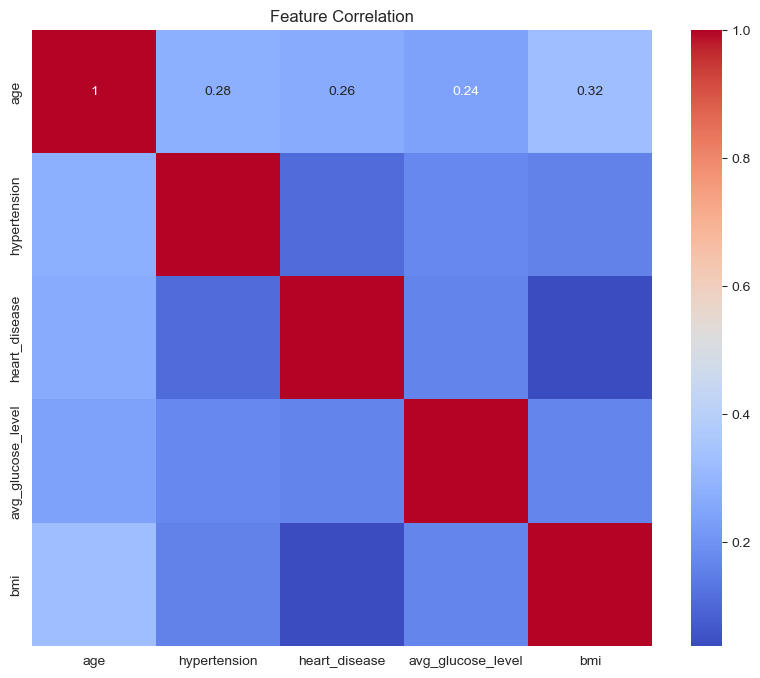

In [169]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

# Encode categorical variables

In [170]:
df = pd.concat([df, pd.get_dummies(df.gender, prefix='gender')], axis=1).drop(columns="gender")

In [171]:
df = pd.concat([df, pd.get_dummies(df.ever_married, prefix='ever_married')], axis=1).drop(columns="ever_married")

In [172]:
df = pd.concat([df, pd.get_dummies(df.work_type, prefix='work_type')], axis=1).drop(columns="work_type")

In [173]:
df = pd.concat([df, pd.get_dummies(df.Residence_type, prefix='Residence_type')], axis=1).drop(columns="Residence_type")

In [174]:
df = pd.concat([df, pd.get_dummies(df.smoking_status, prefix='smoking_status')], axis=1).drop(columns="smoking_status")

In [175]:
df.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,,
9046,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
51676,61.0,0,0,202.21,28.1,1,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
31112,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [176]:
# Split and Apply SMOTE
X = df.drop('stroke', axis=1)
y = df['stroke']

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [178]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [179]:
print('Before SMOTE:', y_train.value_counts())
print('-------')
print('After SMOTE:', y_train_bal.value_counts())

Before SMOTE: 0    3889
1     199
Name: stroke, dtype: int64
-------
After SMOTE: 0    3889
1    3889
Name: stroke, dtype: int64


Model Training
will Try the below models:

1- Logistic Regression

2- Random Forest

3- XGBoost

In [180]:
# Model Training
# Logistic Regression
lRegression = LogisticRegression(max_iter=1000)
lRegression.fit(X_train_bal, y_train_bal)
y_pred_lRegression = lRegression.predict(X_test)

In [181]:
# Logistic Regression
y_pred_lRegression = y_pred_lRegression.astype(str)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lRegression))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       972
           1       0.44      0.14      0.21        50

    accuracy                           0.95      1022
   macro avg       0.70      0.57      0.59      1022
weighted avg       0.93      0.95      0.94      1022



In [182]:
# confusion matrix
cf = pd.DataFrame(columns=["0", "1"], index=["0", "1"])
cf.loc[:, :] = confusion_matrix(y_true=y_test, y_pred=y_pred_lRegression)
print(cf)
print('')
print(cf / len(y_test))

     0  1
0  963  9
1   43  7

          0         1
0   0.94227  0.008806
1  0.042074  0.006849


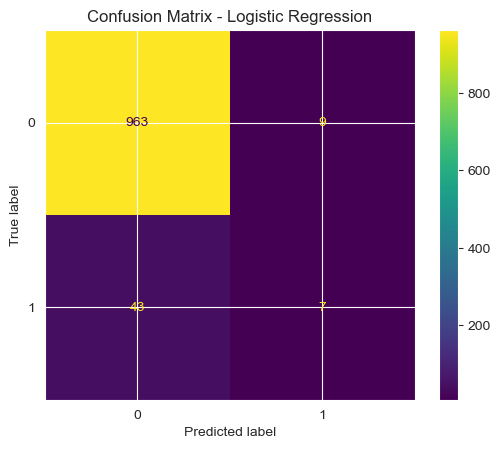

In [183]:
# confusion_matrix display
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lRegression)).plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [184]:
# Random Forest
rForest = RandomForestClassifier()
rForest.fit(X_train_bal, y_train_bal)
y_pred_rForest = rForest.predict(X_test)


In [185]:
# Random Forest
y_pred_rForest = y_pred_rForest.astype(str)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rForest))
#print(confusion_matrix(y_test, y_pred_rForest))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.18      0.06      0.09        50

    accuracy                           0.94      1022
   macro avg       0.56      0.52      0.53      1022
weighted avg       0.92      0.94      0.93      1022



In [186]:
# confusion_matrix
cf_forest = pd.DataFrame(columns=["0", "1"], index=["0", "1"])
cf_forest.loc[:, :] = confusion_matrix(y_true=y_test, y_pred=y_pred_rForest)
print(cf_forest)
print('')
print(cf_forest / len(y_test))

     0   1
0  958  14
1   47   3

          0         1
0  0.937378  0.013699
1  0.045988  0.002935


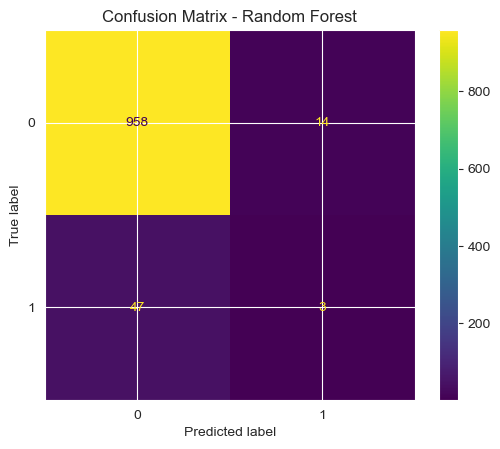

In [187]:
# confusion_matrix display
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rForest)).plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [188]:
# XGBoost
# Convert y_train_bal, and y_test from strings to integers
y_train_bal = y_train_bal.astype(int)
y_test = y_test.astype(int)

xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train_bal, y_train_bal)
y_pred_xgb = xgb.predict(X_test)

In [189]:
# XGBoost
y_pred_xgb = y_pred_xgb.astype(int)
print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
#print(confusion_matrix(y_test, y_pred_xgb))

XGBoost Results:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       972
           1       0.17      0.10      0.13        50

    accuracy                           0.93      1022
   macro avg       0.56      0.54      0.55      1022
weighted avg       0.92      0.93      0.92      1022



In [190]:
# confusion_matrix
cf_xgb = pd.DataFrame(columns=["0", "1"], index=["0", "1"])
cf_xgb.loc[:, :] = confusion_matrix(y_true=y_test, y_pred=y_pred_xgb)
print(cf_xgb)
print('')
print(cf_xgb / len(y_test))

     0   1
0  948  24
1   45   5

          0         1
0  0.927593  0.023483
1  0.044031  0.004892


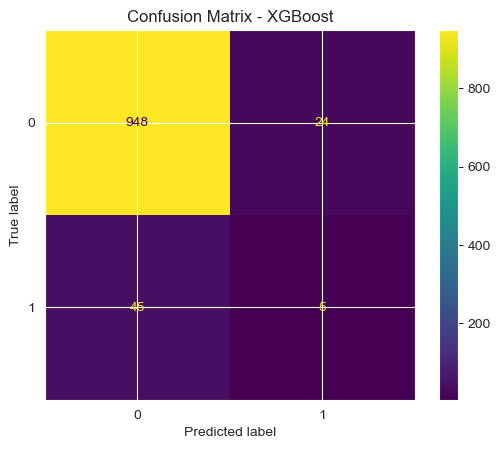

In [191]:
# confusion_matrix display
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb)).plot()
plt.title("Confusion Matrix - XGBoost")
plt.show()

Model Evaluation all models

In [192]:
# Manual Testing
# Get all training features
columns = X_train.columns.tolist()

# Create a base dictionary with all features set to 0
input_data = {col: 0 for col in columns}

# add any columns with its value to predict if stroke is negative or positive
input_data.update({
    'age': 67.0,  # Age of the patient
    'hypertension': 1,  # 1 if patient has hypertension, 0 otherwise
    'heart_disease': 0,  # 1 if patient has heart disease, 0 otherwise
    'avg_glucose_level': 228.69,  # Average glucose level
    'bmi': 36.6,  # Body mass index
    'gender_Male': 1,  # 1 if Male
    'ever_married_Yes': 1,  # 1 if ever married
    'work_type_Private': 1,  # 1 if Private worker
    'Residence_type_Urban': 1,  # 1 if Urban residence
    'smoking_status_formerly smoked': 1,  # 1 if formerly smoked
})

In [193]:
# Convert to DataFrame
input_df = pd.DataFrame([input_data])

In [194]:
# Predict
predicted_class = xgb.predict(input_df)[0]
print("Prediction:", "Stroke" if predicted_class == 1 else "No Stroke")

Prediction: No Stroke
